In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"   

sns.set(style="whitegrid")

In [ ]:
# Cell 2 — Load Dataset

file_path = r"dataSet/path"
df = pd.read_csv(file_path)

df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [10]:
port_features = df.groupby('AustralianPort').agg({
    'Passengers_In': 'sum',
    'Passengers_Out': 'sum',
    'Freight_In_(tonnes)': 'sum',
    'Freight_Out_(tonnes)': 'sum',
    'Mail_In_(tonnes)': 'sum',
    'Mail_Out_(tonnes)': 'sum'
}).reset_index()

# Derived features
port_features['Passengers_Total'] = port_features['Passengers_In'] + port_features['Passengers_Out']
port_features['Freight_Total'] = port_features['Freight_In_(tonnes)'] + port_features['Freight_Out_(tonnes)']
port_features['Mail_Total'] = port_features['Mail_In_(tonnes)'] + port_features['Mail_Out_(tonnes)']

port_features


,AustralianPort,Passengers_In,Passengers_Out,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total,Mail_Total
0,Adelaide,8839359,8491878,246389.230,337273.194,3176.177,3614.742,17331237,5.836624e+05,6790.919
1,Brisbane,62348372,60049958,1348150.518,1683570.782,50105.225,55704.104,122398330,3.031721e+06,105809.329
2,Broome,7186,7641,0.000,0.173,0.000,0.000,14827,1.730000e-01,0.000
3,Cairns,10545686,10232814,65814.178,181249.898,1421.585,2507.639,20778500,2.470641e+05,3929.224
4,Canberra,171941,185899,1095.338,267.199,0.037,0.006,357840,1.362537e+03,0.043
5,Christmas Island,37464,37387,595.973,19.719,78.207,1.372,74851,6.156920e+02,79.579
6,Darwin,3235849,3172067,12644.899,20405.353,403.530,708.549,6407916,3.305025e+04,1112.079
7,Gold Coast,6140066,6016439,46101.170,16687.739,896.307,1879.655,12156505,6.278891e+04,2775.962
8,Gold Coast/Coolangatta,629000,626075,1593.602,314.169,0.000,0.000,1255075,1.907771e+03,0.000
9,Hobart,119455,110254,1133.563,1118.693,5.704,0.364,229709,2.252256e+03,6.068


In [11]:
X = port_features[
    ['Passengers_Total', 'Freight_Total', 'Mail_Total',
     'Passengers_In', 'Passengers_Out',
     'Freight_In_(tonnes)', 'Freight_Out_(tonnes)']
]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

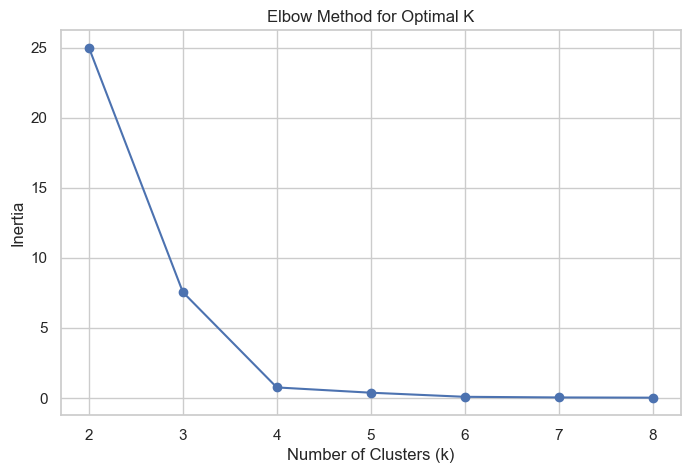

In [13]:
inertia = []
k_range = range(2, 9)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [18]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
port_features['Cluster'] = kmeans.fit_predict(X_scaled)

port_features[['AustralianPort', 'Cluster']]

,AustralianPort,Cluster
0,Adelaide,0
1,Brisbane,2
2,Broome,0
3,Cairns,0
4,Canberra,0
5,Christmas Island,0
6,Darwin,0
7,Gold Coast,0
8,Gold Coast/Coolangatta,0
9,Hobart,0


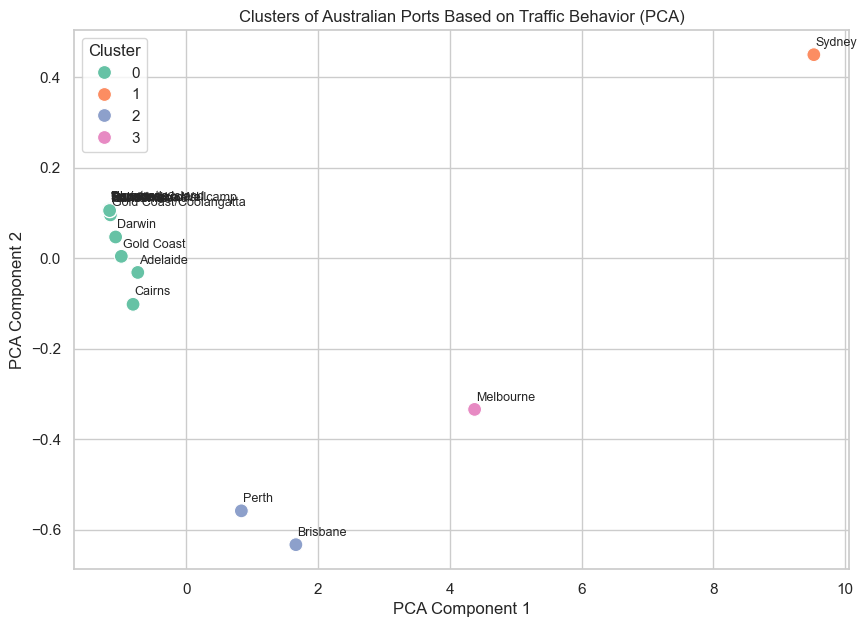

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=port_features['Cluster'],
                palette='Set2', s=100)

for i, name in enumerate(port_features['AustralianPort']):
    plt.text(X_pca[i,0]+0.02, X_pca[i,1]+0.02, name, fontsize=9)

plt.title("Clusters of Australian Ports Based on Traffic Behavior (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [20]:
cluster_summary = port_features.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,Passengers_In,Passengers_Out,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total,Mail_Total
Cluster,,,,,,,,,
0,2.017774e+06,1961097.8,2.546383e+04,3.811509e+04,406.946867,587.819933,3.978872e+06,6.357892e+04,994.7668
1,1.766734e+08,177093711.0,8.415146e+06,5.775543e+06,417989.004000,230837.031000,3.537671e+08,1.419069e+07,648826.0350
2,5.331174e+07,51438470.0,1.167463e+06,1.516744e+06,37876.095500,37836.243000,1.047502e+08,2.684206e+06,75712.3385
3,9.391188e+07,91791942.0,3.815019e+06,3.874944e+06,164939.072000,98086.433000,1.857038e+08,7.689962e+06,263025.5050


# 🧠 Clustering of Australian Ports Based on Traffic Behavior

## Objective

The purpose of this analysis is to group Australian international airports into clusters based on their **traffic behavior**, including passenger volume, freight tonnage, and mail transport. By clustering ports with similar operational profiles, we can identify different functional roles within the international aviation network, such as global hubs, major gateways, and regional airports.

---

## Feature Engineering and Data Preparation

To characterize the traffic behavior of each port, the following features were aggregated across the full time period:

* Inbound passengers
* Outbound passengers
* Inbound freight (tonnes)
* Outbound freight (tonnes)
* Inbound mail (tonnes)
* Outbound mail (tonnes)

Additional total-volume features were computed for passengers, freight, and mail to capture overall activity levels.

Since these features have very different numerical scales, all variables were **standardized using z-score normalization** before clustering to prevent dominance of high-magnitude variables such as passenger counts.

---

## Clustering Methodology

The **K-Means clustering algorithm** was selected due to its effectiveness in identifying compact, well-separated clusters in multidimensional feature spaces.

To determine the optimal number of clusters, the **Elbow Method** was applied by evaluating the within-cluster sum of squares (inertia) for values of *k* ranging from 2 to 8. The inertia curve shows a sharp decrease until **k = 4**, after which further increases in cluster count produce only marginal improvements.

Therefore, **k = 4 clusters** was selected as the optimal balance between model complexity and explanatory power.

---

## Visualization of Clusters Using PCA

To visualize the clustering structure, **Principal Component Analysis (PCA)** was applied to project the standardized feature space into two dimensions. The resulting scatter plot shows clear separation between clusters, particularly highlighting the strong isolation of major hub airports from regional airports.

The PCA visualization confirms that:

* One cluster is dominated by a single extreme hub (Sydney)
* Another cluster represents a secondary large hub (Melbourne)
* A third cluster includes medium-volume international gateways
* The final cluster contains small and regional international airports

This visual separation validates the effectiveness of the clustering process.

---

## Cluster Profiles and Interpretation

The four clusters exhibit distinct operational characteristics:

### 🟢 Cluster 0 — Regional and Secondary International Airports

**Includes:**
Adelaide, Cairns, Darwin, Gold Coast, Hobart, Canberra, Townsville, Newcastle, Norfolk Island, and others.

**Characteristics:**

* Low passenger volumes
* Very low freight and mail transport
* Limited international connectivity
* Often seasonal or tourism-oriented routes

**Interpretation:**
These airports primarily serve regional populations and niche international markets. Their operations are focused on tourism and limited international connections rather than acting as global transit hubs.

---

### 🔴 Cluster 1 — Global Mega Hub

**Includes:**
Sydney (only)

**Characteristics:**

* Extremely high passenger traffic
* Dominant freight and mail volumes
* Balanced inbound and outbound flows

**Interpretation:**
Sydney functions as Australia’s primary international aviation hub, serving as a gateway to all major global regions. Its operational scale is so distinct that it forms its own cluster, highlighting its structural uniqueness within the national network.

---

### 🔵 Cluster 2 — Major International Gateways

**Includes:**
Brisbane and Perth

**Characteristics:**

* High passenger volumes
* Moderate-to-high freight operations
* Strategic geographic positioning for Asia-Pacific and long-haul routes

**Interpretation:**
These airports act as important secondary hubs that support both passenger travel and freight logistics, particularly for connections to Asia and the Middle East. They serve as alternatives to Sydney and Melbourne for long-distance international traffic.

---

### 🟣 Cluster 3 — Primary National Hub

**Includes:**
Melbourne (only)

**Characteristics:**

* Very high passenger and freight volumes
* Strong international connectivity
* Lower total scale compared to Sydney but significantly larger than other ports

**Interpretation:**
Melbourne serves as a national primary hub with diversified international services. While comparable to Sydney in scope, its traffic profile remains sufficiently distinct to justify a separate cluster.

---

## Structural Insights from Clustering

The clustering results reveal that Australia’s international airport system is **highly centralized**, with traffic concentrated in two dominant hubs (Sydney and Melbourne), supported by a small number of major gateways and a large number of regional airports with limited international operations.

This structure reflects airline network optimization strategies, where high-frequency and long-haul routes are concentrated in major metropolitan centers while smaller airports depend on selective international connections.

---

## Validation and Robustness

The strong separation of clusters in PCA space, along with clear differences in aggregated traffic metrics, indicates that the clustering is not arbitrary but reflects genuine operational distinctions. The results are consistent with known real-world aviation infrastructure patterns, confirming the practical validity of the clustering approach.

---

## Conclusion

Clustering Australian ports based on traffic behavior successfully identifies functional roles within the international aviation network. The results demonstrate that airports naturally group into categories of mega hubs, primary hubs, major gateways, and regional airports, each serving distinct economic and logistical functions. Such classification can assist policymakers and airline planners in understanding infrastructure demand, optimizing route development, and improving resilience against future disruptions.
